# EDA on San Francisco's Compensation Data

In [1]:
#first step is to import and take a quick look at the info
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import numpy as np

In [2]:
sfcompraw = pd.read_csv('employee-compensation.csv')

In [3]:
#info, 683277
sfcompraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [4]:
#check for missing values
sfcompraw.isna().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [5]:
#calculate difference between total comp and salary
sfcompraw['diff']=sfcompraw['Total Compensation'] - sfcompraw['Total Salary']

In [6]:
#set Year Type to Calendar Only
sfcompraw = sfcompraw[sfcompraw['Year Type']== 'Calendar']

In [7]:
#top 5 overtime by department
sfcompraw.groupby('Union Code')['Overtime'].sum().sort_values(ascending=False).head(5)

Union Code
911.0    3.081001e+08
798.0    2.670896e+08
253.0    2.178631e+08
790.0    1.707005e+08
498.0    1.302500e+08
Name: Overtime, dtype: float64

In [8]:
#extract union code 911
pol = sfcompraw[sfcompraw['Union Code']== 911.0]

In [9]:
#make sure Union is the same
pol.replace("Police Officers' Association", "POA")

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,diff
2923,1,Q000,Q002,Calendar,2013,Public Protection,FIR,FIR Fire Department,911.0,POA,...,488.40,0.00,7.63,496.03,86.50,71.77,35.00,193.27,689.30,193.27
4008,1,Q000,0380,Calendar,2013,Public Protection,POL,POL Police,911.0,POA,...,65130.06,5166.27,106479.00,176775.33,12299.29,6219.89,176.46,18695.64,195470.97,18695.64
4009,1,Q000,0380,Calendar,2013,Public Protection,POL,POL Police,911.0,POA,...,152831.70,13620.97,13947.43,180400.10,30769.44,12918.25,434.93,44122.62,224522.72,44122.62
4010,1,Q000,0381,Calendar,2013,Public Protection,POL,POL Police,911.0,POA,...,67756.00,3500.35,64662.88,135919.23,12765.68,6219.89,195.10,19180.67,155099.90,19180.67
4011,1,Q000,0381,Calendar,2013,Public Protection,POL,POL Police,911.0,POA,...,141877.14,1665.40,10158.49,153701.03,27614.06,0.00,2612.91,30226.97,183928.00,30226.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260836,1,Q000,Q082,Calendar,2019,Public Protection,POL,Police,911.0,POA,...,222858.20,0.00,5557.21,228415.41,43405.09,16741.38,3805.45,63951.92,292367.33,63951.92
260837,1,Q000,Q082,Calendar,2019,Public Protection,POL,Police,911.0,POA,...,221692.00,1412.78,1100.06,224204.84,42325.36,15885.99,3794.98,62006.33,286211.17,62006.33
260838,1,Q000,Q082,Calendar,2019,Public Protection,POL,Police,911.0,POA,...,221692.00,0.00,5533.90,227225.90,43167.66,15885.99,3785.19,62838.84,290064.74,62838.84
260839,1,Q000,Q082,Calendar,2019,Public Protection,POL,Police,911.0,POA,...,221625.01,1334.26,10765.02,233724.29,43122.78,15885.99,3950.65,62959.42,296683.71,62959.42


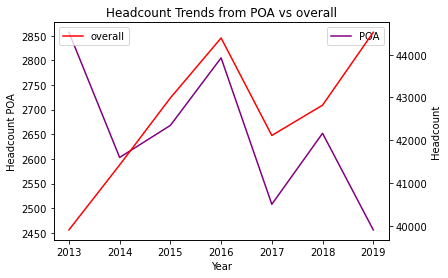

In [10]:
#average headcount vs overall
fig, ax = plt.subplots()
ax1 = pol.groupby('Year')['Employee Identifier'].count().plot(color='purple',label='POA')
ax1.legend()
plt.ylabel('Headcount POA')
ax2 =ax1.twinx()
ax2 = sfcompraw.groupby('Year')['Employee Identifier'].count().plot(color='red',label='overall')
ax2.legend()
plt.ylabel('Headcount')
plt.title('Headcount Trends from POA vs overall')
plt.show()

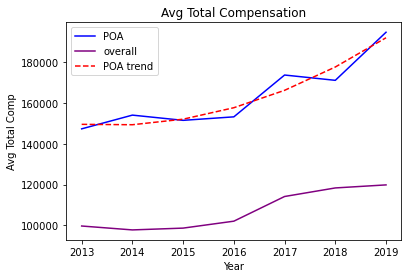

In [11]:
#average total comp vs overall
fig, ax = plt.subplots()
ax1 = pol.groupby('Year')['Total Compensation'].mean().plot(color='blue',label='POA')
ax2 = sfcompraw.groupby('Year')['Total Compensation'].mean().plot(color='purple',label='overall')
plt.ylabel('Avg Total Comp')
plt.title('Avg Total Compensation')
z=np.polyfit(pol['Year'],pol['Total Compensation'],2)
p=np.poly1d(z)
plt.plot(pol['Year'],p(pol['Year']),"r--", label='POA trend')
ax.legend()
plt.show()

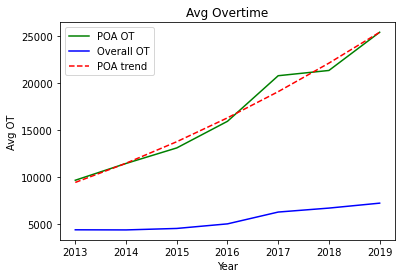

In [12]:
#average total overtime
fig, ax = plt.subplots()
ax1 = pol.groupby('Year')['Overtime'].mean().plot(color='green',label='POA OT')
ax2 = sfcompraw.groupby('Year')['Overtime'].mean().plot(color='blue',label='Overall OT')
plt.ylabel('Avg OT')
z=np.polyfit(pol['Year'],pol['Overtime'],2)
p=np.poly1d(z)
plt.plot(pol['Year'],p(pol['Year']),"r--", label='POA trend')
ax.legend()
plt.title('Avg Overtime')
plt.show()

In [13]:
#load sf incident data
sfincidents = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
sfincidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [14]:
#we only want to look at 2013 and forward
sfincidents['Date']=pd.to_datetime(sfincidents['Date'])
sfincidents=sfincidents[(sfincidents['Date']>= '2013-01-01')]

In [15]:
sfincidents=sfincidents.drop(columns=["SF Find Neighborhoods 2 2",
"Current Police Districts 2 2",
"Current Supervisor Districts 2 2",
"Analysis Neighborhoods 2 2",
"DELETE - Fire Prevention Districts 2 2",
"DELETE - Police Districts 2 2",
"DELETE - Supervisor Districts 2 2",
"DELETE - Zip Codes 2 2",
"DELETE - Neighborhoods 2 2",
"DELETE - 2017 Fix It Zones 2 2",
"Civic Center Harm Reduction Project Boundary 2 2",
"Fix It Zones as of 2017-11-06  2 2",
"DELETE - HSOC Zones 2 2",
"Fix It Zones as of 2018-02-07 2 2",
"CBD, BID and GBD Boundaries as of 2017 2 2",
"Areas of Vulnerability, 2016 2 2",
"Central Market/Tenderloin Boundary 2 2",
"Central Market/Tenderloin Boundary Polygon - Updated 2 2",
"HSOC Zones as of 2018-06-05 2 2",
"OWED Public Spaces 2 2",
"Neighborhoods 2","location"])

In [16]:
sfincidents.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y
7,18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2018-04-25,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.388543,37.728789
8,18023216504170,180232165,4170,ASSAULT,FALSE IMPRISONMENT,Saturday,2018-03-24,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.419053,37.758632
9,16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-03-01,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.431958,37.764936
10,17103493468020,171034934,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,2017-12-22,23:30,NORTHERN,NONE,800 Block of FELL ST,-122.431857,37.774850
11,17609651906372,176096519,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,2017-04-15,00:45,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433622,37.800270


In [17]:
sfincidents['Year'] =sfincidents['Date'].dt.year

In [ ]:
sfincidents.to_csv('sfincidents.csv',index=False)

In [ ]:
#plot of incidents to see if the decline of headcount affects workload
sfincidents.groupby('Date')['IncidntNum'].count().plot()
plt.title('Police Reported Incidents')
plt.ylabel('Count of Incidents')
plt.show()

In [ ]:
#what titles are spending the most on overtime?
pol.pivot_table(values='Overtime', index='Job', columns='Year', fill_value='0.0', aggfunc=sum, margins=True).sort_values(by='All',ascending=False)

In [ ]:
#looks like police officers spend the most, so we should look more into it
officers=pol[pol['Job'].str.contains("Police Officer")]

In [ ]:
#what's the average salary of these police officers without benefits/OT?
sns.lineplot(data=officers, x='Year', y='Total Salary', hue='Job')

In [ ]:
#average overtime by title?
sns.lineplot(data=officers, x='Year', y='Overtime', hue='Job')

In [ ]:
#what happens when we take the sum of all OT spent to date and divide it by the average salary of a police officer?
avgsalary=officers['Total Salary'].mean()
sumot=officers['Overtime'].sum()
print((sumot/avgsalary)/(2019-2013))

In [ ]:
#OT avg by year, 10%
tenpct=(sumot/(2019-2013))*.1

In [ ]:
#how many officers can we hire to cover the 10% in OT?
tenpct/avgsalary